# Day 2: Part X - Evaluation of Machine Learning Model Performance

This notebook will present how to evaluate a machine learning model's prediction performance. We will do so by computing R-squared and mean squared error for regression models; and accuracy, precision and recall for classification models. The notebook focuses mostly on the performance measures; data preprocessing is done to some extend, however is not extensive and the final performance of the machine learning models might not be the best that can be achieved. You are free to play with the datasets on your own to try to improve the prediction performance of already used models, or use different ones.

## Importing libraries
Below you can find all libraries that will be used in this notebook. You should run it everytime you open the notebook, otherwise some functions might not work.

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns

import matplotlib.pyplot as plt

## 1. Regression

This section presents how regression model can be evaluated using R-squared and Mean Squared Error. We will use wine quality dataset for this purpose.

In [2]:
dataset_url = 'http://mlr.cs.umass.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
data = pd.read_csv(dataset_url, sep=';')

data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


We will try to predict quality of the wine based on other characteristics, therefore we will pop the column from the data frame.

In [3]:
target = data.pop('quality')

Now, we will normalise the feature vector, column by column.

In [4]:
for column in data.columns:
    vector = data[column].values.reshape(1, len(data[column]))
    normalized_vector = preprocessing.normalize(vector, norm="l2")
    data[column] = normalized_vector.reshape(len(data[column]), 1)
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.021772,0.031409,0.000000,0.016363,0.019136,0.014471,0.014936,0.025034,0.026481,0.020606,0.022436
1,0.022949,0.039485,0.000000,0.022391,0.024676,0.032889,0.029433,0.025009,0.024142,0.025022,0.023391
2,0.022949,0.034101,0.002998,0.019808,0.023165,0.019733,0.023722,0.025014,0.024595,0.023918,0.023391
3,0.032952,0.012563,0.041968,0.016363,0.018885,0.022364,0.026358,0.025039,0.023841,0.021342,0.023391
4,0.021772,0.031409,0.000000,0.016363,0.019136,0.014471,0.014936,0.025034,0.026481,0.020606,0.022436


Splitting into train, cross-validation, and test datasets.

In [5]:
# split into (train + cross validation) and test sets
X_x, X_test, y_x, y_test = train_test_split(data, target, test_size=0.1, random_state=42)

# split into train and cross validation
X_train, X_cv, y_train, y_cv = train_test_split(X_x, y_x, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape, X_cv.shape, y_cv.shape, X_test.shape, y_test.shape)

(1151, 11) (1151,) (288, 11) (288,) (160, 11) (160,)


Now, we will gradually include column by column in our prediction model. We will start with *fixed acidicity*, then we will add *volatile acidity*, etc.

First, we will inspect the columns:

In [6]:
X_train.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

We will create a list of "no_features" where we will specify the indexes of columns that will be included in the regresson model.

In [7]:
no_features = [i for i in range(1, 12)]
no_features

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

Now, we will create four arrays in which we will store the performance of the model during each iteration: *r2_train*, *r2_cv*, *mean_2_error_train*, and *mean_2_error_cv*. In each iteration we will slice the original dataset to include only specific columns by using *new_x_train = X_train[data_columns[:i]]*. We will train our model on *new_x_train* variable instead of *X_train*.

After obtaining prediction values for the train and cross-valisation datasets, we will round the values using ** *round()* ** function. Rounding will be performed because wine quality feature is an integer, and linear regresion provides prediction values as floats e.g. 5.6.

In each iteration we will compute the R-square and Mean Squared Error by executing functions ** *r2_score( true_value, predicted_value )* ** and ** *mean_squared_error( true_value, predicted_value )* **for both training and cross-validation sets.

Both metrics will be appended to *r2_train*, *r2_cv*, *mean_2_error_train*, and *mean_2_error_cv* lists and plotted to observe how the error and R-squared improves while including more features.

In [8]:
r2_train = []
r2_cv = []
mean_2_error_train = []
mean_2_error_cv = []

data_columns = X_train.columns

for i in no_features:
    new_x_train = X_train[data_columns[:i]]
    new_x_cv = X_cv[data_columns[:i]]
    
    regression = linear_model.LinearRegression()
    regression.fit(new_x_train, y_train)
    
    y_train_pred = regression.predict(new_x_train)
    y_cv_pred = regression.predict(new_x_cv)
    
    y_train_pred = y_train_pred.round()
    y_cv_pred = y_cv_pred.round()
    
    r2_score_train = r2_score(y_train, y_train_pred)
    r2_score_cv = r2_score(y_cv, y_cv_pred)
    
    m2e_train = mean_squared_error(y_train, y_train_pred)
    m2e_cv = mean_squared_error(y_cv, y_cv_pred)
    
    r2_train.append(r2_score_train)
    r2_cv.append(r2_score_cv)
    mean_2_error_train.append(m2e_train)
    mean_2_error_cv.append(m2e_cv)

Now, we can plot our R-square and Mean Squared Erorr using matplotlib

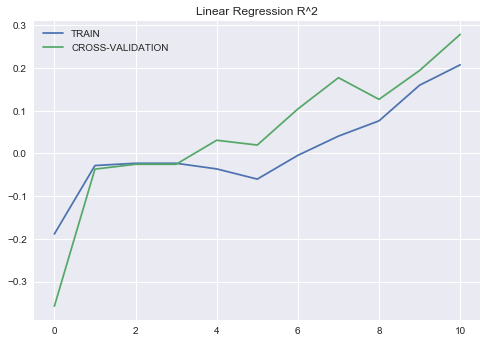

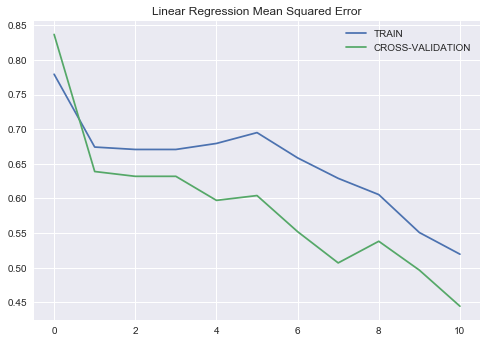

In [9]:
plt.figure() 
plt.plot(range(0, len(r2_train)), r2_train, range(0, len(r2_cv)), r2_cv)
plt.title("Linear Regression R^2")
plt.legend(['TRAIN', 'CROSS-VALIDATION'])
plt.show()

plt.figure()
plt.plot(range(0, len(mean_2_error_train)), mean_2_error_train, range(0, len(mean_2_error_cv)), mean_2_error_cv)
plt.title("Linear Regression Mean Squared Error")
plt.legend(['TRAIN', 'CROSS-VALIDATION'])
plt.show()

 Can you try to describe what happens with the R-squared and Mean Squared Errors while we add more features? Are they increasing or decreasing? Is it desirable behaviour?
 
 After choosing number of features and setting parameters, we can evaluate our model on the test set.

In [10]:
regression = linear_model.LinearRegression()
regression.fit(X_train, y_train)
    
y_test_pred = regression.predict(X_test)
y_test_pred = y_test_pred.round()

print("R^2:", r2_score(y_test, y_test_pred))
print("MSE:", mean_squared_error(y_test, y_test_pred))

R^2: 0.316119210727
MSE: 0.45625


Which yields similar performance. You are free to try other machine learning models to check if they can improve prediction performance.

## 2. Classification

This section will show how to evaluate performance of the classification model using the most common metrics: accuracy, prediction, and recall.

We will work with the Traffic Accident dataset, downloaded from Leeds City Council website. If you are interested in more information about the dataset you can visit: https://data.gov.uk/dataset/road-traffic-accidents

In [11]:
file_name = "./datasets/Leeds_RTC2.csv"
data = pd.read_csv(file_name, sep=',')

data.head()

,Reference Number,Number of Vehicles,Time (24hr),1st Road Class,Road Surface,Lighting Conditions,Weather Conditions,Casualty Class,Casualty Severity,Sex of Casualty,Age of Casualty,Type of Vehicle
0,2181280,2,1905,A,Dry,Darkness: street lights present and lit,Fine without high winds,Driver or rider,Serious,Male,38,Motorcycle over 500cc
1,2191037,2,1615,Unclassified,Dry,Darkness: street lights present and lit,Fine without high winds,Driver or rider,Slight,Female,50,Car
2,2CQ0870,2,1645,Unclassified,Dry,Daylight: street lights present,Fine without high winds,Driver or rider,Slight,Male,26,Car
3,2CQ0870,2,1645,Unclassified,Dry,Daylight: street lights present,Fine without high winds,Vehicle or pillion passenger,Slight,Female,22,Car
4,3111091,2,956,A,Wet / Damp,Daylight: street lights present,Fine without high winds,Driver or rider,Slight,Male,57,Pedal cycle


We will use this dataset for *Casualty Severity* prediction.

Majority of the features are categorical features, therefore we will perform numerical encoding on them  (However for some cases one hot encoding might be more appropriate - we will not cover this issue in this notebook). We will remove *Reference Number* since it is not relevant for the task.

In [12]:
del data['Reference Number']

data['1st Road Class'] = data['1st Road Class'].astype('category')
data['1st Road Class'] = data['1st Road Class'].cat.codes

data['Road Surface'] = data['Road Surface'].astype('category')
data['Road Surface'] = data['Road Surface'].cat.codes

data['Lighting Conditions'] = data['Lighting Conditions'].astype('category')
data['Lighting Conditions'] = data['Lighting Conditions'].cat.codes

data['Weather Conditions'] = data['Weather Conditions'].astype('category')
data['Weather Conditions'] = data['Weather Conditions'].cat.codes

data['Casualty Class'] = data['Casualty Class'].astype('category')
data['Casualty Class'] = data['Casualty Class'].cat.codes

data['Casualty Severity'] = data['Casualty Severity'].astype('category')
data['Casualty Severity'] = data['Casualty Severity'].cat.codes

data['Sex of Casualty'] = data['Sex of Casualty'].astype('category')
data['Sex of Casualty'] = data['Sex of Casualty'].cat.codes

data['Type of Vehicle'] = data['Type of Vehicle'].astype('category')
data['Type of Vehicle'] = data['Type of Vehicle'].cat.codes

In [13]:
data.head()

,Number of Vehicles,Time (24hr),1st Road Class,Road Surface,Lighting Conditions,Weather Conditions,Casualty Class,Casualty Severity,Sex of Casualty,Age of Casualty,Type of Vehicle
0,2,1905,0,0,2,2,1,1,1,38,12
1,2,1615,5,0,2,2,1,2,0,50,2
2,2,1645,5,0,4,2,1,2,1,26,2
3,2,1645,5,0,4,2,5,2,0,22,2
4,2,956,0,4,4,2,1,2,1,57,15


In [14]:
target = data.pop('Casualty Severity')

Below you can find the code to perform column normalization.

In [15]:
for column in data.columns:
    vector = data[column].values.reshape(1, len(data[column]))
    normalized_vector = preprocessing.normalize(vector, norm="l2")
    data[column] = normalized_vector.reshape(len(data[column]), 1)
data.head()

/Users/pascalwichmann/anaconda/envs/py36ML/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the normalize function.
  warnings.warn(msg, _DataConversionWarning)
/Users/pascalwichmann/anaconda/envs/py36ML/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int8 was converted to float64 by the normalize function.
  warnings.warn(msg, _DataConversionWarning)


,Number of Vehicles,Time (24hr),1st Road Class,Road Surface,Lighting Conditions,Weather Conditions,Casualty Class,Sex of Casualty,Age of Casualty,Type of Vehicle
0,0.009555,0.012654,0.000000,0.000000,0.005607,0.006424,0.003885,0.012923,0.009430,0.015884
1,0.009555,0.010728,0.013245,0.000000,0.005607,0.006424,0.003885,0.000000,0.012408,0.002647
2,0.009555,0.010927,0.013245,0.000000,0.011214,0.006424,0.003885,0.012923,0.006452,0.002647
3,0.009555,0.010927,0.013245,0.000000,0.011214,0.006424,0.019424,0.000000,0.005459,0.002647
4,0.009555,0.006350,0.000000,0.019907,0.011214,0.006424,0.003885,0.012923,0.014145,0.019855


Splitting into train, cross-validation and test datasets.

In [16]:
# split into (train + cross validation) and test sets
X_x, X_test, y_x, y_test = train_test_split(data, target, test_size=0.1, random_state=42)

# split into train and cross validation
X_train, X_cv, y_train, y_cv = train_test_split(X_x, y_x, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape, X_cv.shape, y_cv.shape, X_test.shape, y_test.shape)

(7324, 10) (7324,) (1832, 10) (1832,) (1018, 10) (1018,)


Similarly as for the regression model, we will gradually include more columns in the model and observe how accuracy, prediction and recall changes. We will use ** *accuracy_score( true_value, predicted_value )* ** for calculating accuracy, ** *recall_score( true_value, predicted_value, average )* ** for calculating recall, and ** *precision_score( true_value, predicted_value, average )* ** for calculating precision. Average in precision and recall defines the strategy to calculate metrics where there are more than 2 categories. For more information use: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html

Similarly as for the regression case, we will round the prediction result, as we cannot predict 5.5 category.

In [17]:
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

accuracy_train = []
accuracy_cv = []
precision_train = []
precision_cv = []
recall_train = []
recall_cv = []

no_features = [i for i in range(1, 12)]

data_columns = X_train.columns

for i in no_features:
    new_x_train = X_train[data_columns[:i]]
    new_x_cv = X_cv[data_columns[:i]]
    
    logistic_reg = linear_model.LogisticRegression()
    logistic_reg.fit(new_x_train, y_train)
    
    y_train_pred = logistic_reg.predict(new_x_train)
    y_cv_pred = logistic_reg.predict(new_x_cv)
    
    y_train_pred = y_train_pred.round()
    y_cv_pred = y_cv_pred.round()
    
    acc_train = accuracy_score(y_train, y_train_pred)
    acc_cv = accuracy_score(y_cv, y_cv_pred)
    prec_train = recall_score(y_train, y_train_pred, average='macro')
    prec_cv = recall_score(y_cv, y_cv_pred, average='macro')
    rec_train = precision_score(y_train, y_train_pred, average='macro')
    rec_cv = precision_score(y_cv, y_cv_pred, average='macro')
    
    accuracy_train.append(acc_train)
    accuracy_cv.append(acc_cv)
    precision_train.append(prec_train)
    precision_cv.append(prec_cv)
    recall_train.append(rec_train)
    recall_cv.append(rec_cv)

/Users/pascalwichmann/anaconda/envs/py36ML/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


You can observe that a warning occurred: UndefinedMetricWarning. It appears here because Logistic Regression did not predict any occurence of some label. This might happen, especially in highly unbalanced datasets.

Plotting accuracy, precition, and recall:

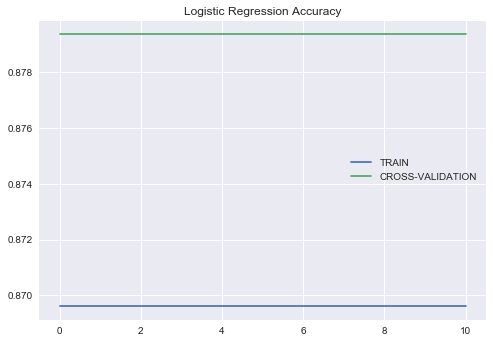

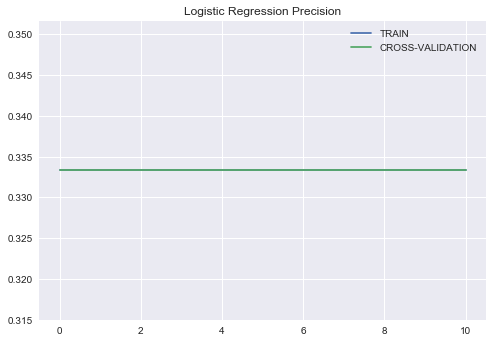

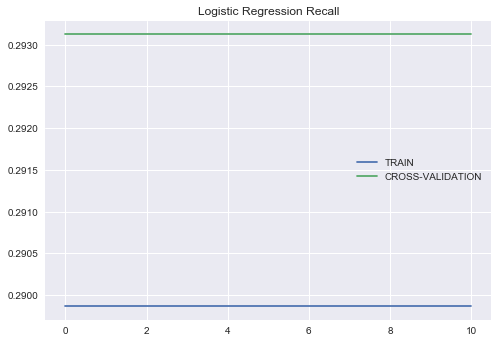

In [18]:
plt.figure() 
plt.plot(range(0, len(accuracy_train)), accuracy_train, range(0, len(accuracy_cv)), accuracy_cv)
plt.title("Logistic Regression Accuracy")
plt.legend(['TRAIN', 'CROSS-VALIDATION'])
plt.show()

plt.figure()
plt.plot(range(0, len(precision_train)), precision_train, range(0, len(precision_cv)), precision_cv)
plt.title("Logistic Regression Precision")
plt.legend(['TRAIN', 'CROSS-VALIDATION'])
plt.show()

plt.figure()
plt.plot(range(0, len(recall_train)), recall_train, range(0, len(recall_cv)), recall_cv)
plt.title("Logistic Regression Recall")
plt.legend(['TRAIN', 'CROSS-VALIDATION'])
plt.show()

Can you comment what is happening on the plots? Why they are not improving with including more features?

There are more metrics except precision and recall, for example F1 score. You can try to write the code that will compute and plot performance of the model using this metric, for more information refer to: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html

And finally testing our model on test data. Can you comment on the results?

In [19]:
regression = linear_model.LogisticRegression()
regression.fit(X_train, y_train)
    
y_test_pred = regression.predict(X_test)
y_test_pred = y_test_pred.round()

print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred, average='macro'))
print("Recall:", recall_score(y_test, y_test_pred, average='macro'))

Accuracy: 0.879174852652
Precision: 0.293058284217
Recall: 0.333333333333


/Users/pascalwichmann/anaconda/envs/py36ML/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
